In [1]:
## Import the dependencies
import os
import shutil
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense,Dropout

In [2]:
## Check whether GPU is available or not
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
TRAIN_DIR = 'PlantDiseaseDataset/Train/'
TEST_DIR = 'PlantDiseaseDataset/Test/'
VALIDATION_DIR = 'PlantDiseaseDataset/Validation/'

# Check how many classes are there
print(f"There are {len(os.listdir(TRAIN_DIR))} classes in the dataset")


There are 3 classes in the dataset


In [4]:
# Create training and validation datagenerator
def train_val_generator(TRAIN_DIR, VAL_DIR):
    train_datagen = ImageDataGenerator(rescale=1.0/255.,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')
    
    train_generator = train_datagen.flow_from_directory(directory = TRAIN_DIR,
                                                       batch_size = 32,
                                                       class_mode = 'categorical',
                                                       target_size = (256,256))
    
    val_datagen = ImageDataGenerator(rescale = 1.0/255.)
    
    val_generator = val_datagen.flow_from_directory(directory = VAL_DIR,
                                                   batch_size = 32,
                                                   class_mode = 'categorical',
                                                   target_size = (256, 256))
    return train_generator, val_generator

In [5]:
train_generator, validation_generator = train_val_generator(TRAIN_DIR, VALIDATION_DIR)

Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [6]:
## Create the functional model
def create_model(learning_rate = 0.001):
    inputs = Input(shape = (256,256,3))
    x = Conv2D(16 ,3 ,activation = 'relu')(inputs)
    
    x = MaxPooling2D(2,2)(x)
    
    x = Conv2D(32 ,3 ,activation = 'relu')(x)
    
    x = MaxPooling2D(2,2)(x)
    
    x = Dropout(0.2)(x)
    
    x = Conv2D(64, 3, activation = 'relu')(x)
    
    x = MaxPooling2D(2,2)(x)
    
    x = Dropout(0.2)(x)
        
    x = Conv2D(128, 3, activation = 'relu')(x)
    
    x = MaxPooling2D(2,2)(x)
    
    x = Conv2D(256, 3, activation = 'relu')(x)
    
    x = MaxPooling2D(2,2)(x)
    
    x = Dropout(0.2)(x)
    
    x = Conv2D(512, 3, activation = 'relu')(x)
    
    x = MaxPooling2D(2,2)(x)
    
    x = Flatten()(x)
    
    x = Dense(512, activation = 'relu')(x)
    
    outputs = Dense(3, activation = 'softmax')(x)
    
    model = tf.keras.Model(inputs = inputs, outputs = outputs)
    
    model.compile(optimizer = RMSprop(learning_rate = learning_rate),
                 loss = tf.keras.losses.CategoricalCrossentropy(),
                 metrics = ['accuracy'])
    return model

In [7]:
# Initialize the model and print the model summary
model = create_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 62, 62, 32)        0     

In [8]:
# Train the model
history = model.fit(train_generator,
                   epochs = 50,
                   validation_data = validation_generator,
                   verbose = 1)

Epoch 1/50
42/42 [==============================] - 103s 2s/step - loss: 1.2171 - accuracy: 0.3540 - val_loss: 1.0985 - val_accuracy: 0.3333
Epoch 2/50
42/42 [==============================] - 97s 2s/step - loss: 1.3319 - accuracy: 0.4017 - val_loss: 2.6157 - val_accuracy: 0.3333
Epoch 3/50
42/42 [==============================] - 93s 2s/step - loss: 1.1292 - accuracy: 0.4463 - val_loss: 1.0035 - val_accuracy: 0.5167
Epoch 4/50
42/42 [==============================] - 95s 2s/step - loss: 1.0240 - accuracy: 0.5340 - val_loss: 1.5208 - val_accuracy: 0.4667
Epoch 5/50
42/42 [==============================] - 96s 2s/step - loss: 0.7127 - accuracy: 0.7587 - val_loss: 6.1716 - val_accuracy: 0.3333
Epoch 6/50
42/42 [==============================] - 96s 2s/step - loss: 0.7945 - accuracy: 0.7874 - val_loss: 0.4525 - val_accuracy: 0.8500
Epoch 7/50
42/42 [==============================] - 96s 2s/step - loss: 0.7279 - accuracy: 0.8359 - val_loss: 0.2544 - val_accuracy: 0.9000
Epoch 8/50
42/42 [=

In [10]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(acc))

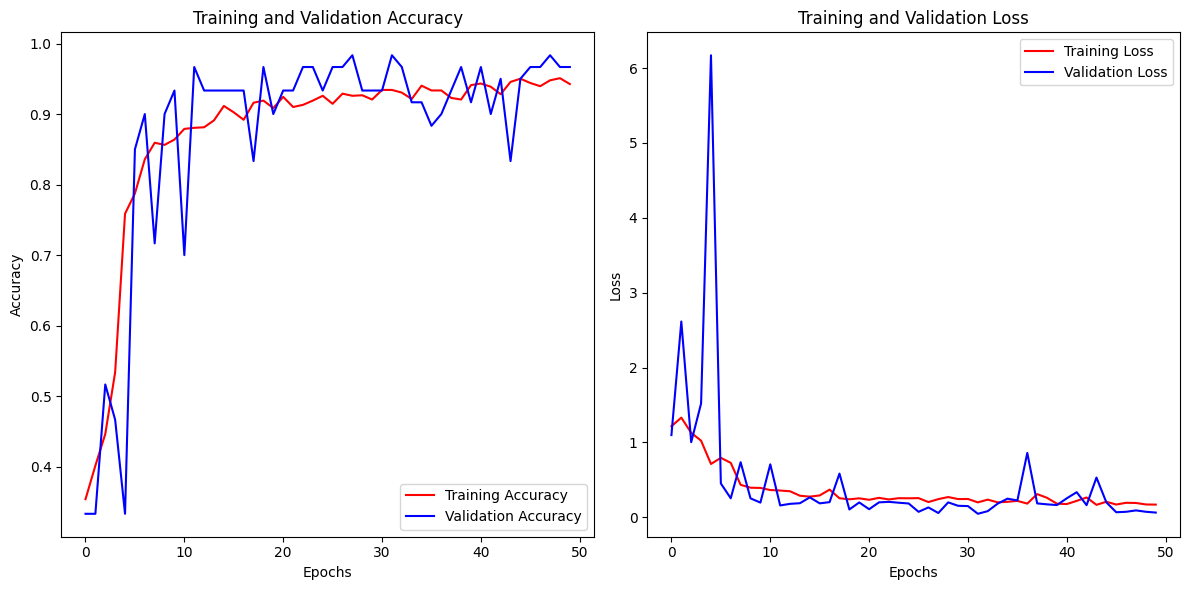

In [11]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Adjust layout and display plots
plt.tight_layout()
plt.show()

FileUpload(value=(), description='Upload', multiple=True)

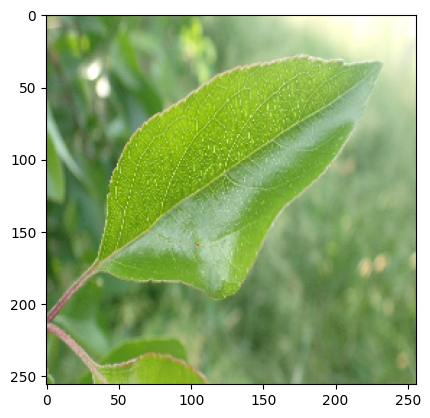

1/1 [==============================] - 0s 22ms/step
This is likely Healthy with probability 100.00%


In [16]:
import numpy as np
from ipywidgets import FileUpload
from tensorflow.keras.utils import load_img, img_to_array
import tempfile
import matplotlib.pyplot as plt  # Make sure to import matplotlib for displaying the image

# Create a file uploader widget
uploader = FileUpload(multiple=True)
display(uploader)

def on_upload_complete(change):
    for uploaded_file in uploader.value:
        with tempfile.NamedTemporaryFile(delete=False) as temp_file:
            temp_file.write(uploaded_file['content'])  # Write the file data using 'content'
            temp_file.flush()  # Ensure data is written to the file
            filename = temp_file.name  # Now filename contains the full path

            # Process the image
            img = load_img(filename, target_size=(256, 256))
            plt.imshow(img)
            plt.show()  # Display the image
            x = img_to_array(img)
            x /= 255
            x = np.expand_dims(x, axis=0)
            images = np.vstack([x])

            # Assuming your model output is an array of probabilities for each class
            probabilities = model.predict(images, batch_size=10)[0]

            # Replace the following with your actual class names
            class_names = ['Healthy', 'Powdery', 'Rust']

            # Get the predicted class index
            predicted_class_index = np.argmax(probabilities)

            # Print the result
            print(f'This is likely {class_names[predicted_class_index]} with probability {probabilities[predicted_class_index]:.2%}')

uploader.observe(on_upload_complete, names='value')
